# Personal Mession - 데이터 분석(6)

# 1. 상관관계 분석
- **목표:** Tube Furnace CP(소입로 가스 침탄량)와 상관계수가 높은 변수들을 확인합니다.
- **작업:**
    - 08_Data.csv 파일을 불러옵니다.
    - Tube Furnace CP와의 상관관계를 계산한 후, 상관계수가 높은 상위 5개 항목(변수)을 선택합니다.

In [28]:
import pandas as pd
df = pd.read_csv("Data/08_Data.csv")
df.head()

,Unnamed: 0,Code_Num,Datetime,Process_Type,ST,Tube Furnace CP,Tube Furnace1 OP,Tube Furnace1 Temp,Tube Furnace2 OP,Tube Furnace2 Temp,Tube Furnace3 OP,Tube Furnace3 Temp,Tube Furnace4 OP,Tube Furnace4 Temp,Z1-OP1,Z1-OP2,Z1-Temp
0,0,GroupA,2022-01-03 11:22,OP-A,NaN,0.450497,73.527404,NaN,59.989422,868.759544,52.249481,NaN,72.134908,NaN,74.255730,76.879748,NaN
1,1,GroupA,2022-01-03 11:22,OP-A,NaN,0.457370,79.149174,878.116929,62.027232,883.821264,50.617109,890.740760,71.245235,894.430606,66.323571,71.297720,NaN
2,2,GroupA,2022-01-03 11:22,OP-A,68.724636,0.454914,78.946336,866.441979,62.235532,882.850031,52.218350,864.373065,72.705558,893.530501,72.909936,71.579322,99.614201
3,3,GroupA,2022-01-03 11:22,OP-A,69.161116,0.456540,78.445719,876.350472,61.608260,906.208463,52.863552,891.107865,73.975640,896.347636,68.754355,73.537496,99.376221
4,4,GroupA,2022-01-03 11:22,OP-C,69.181098,0.460100,76.673808,903.587677,61.589311,867.215131,52.297196,893.206883,71.887865,871.594283,69.692302,72.461153,99.809053


In [29]:
df2 = df.select_dtypes(include = ["number"]) 

# 피어슨 상관계수
correlations = df2.corr(method = "pearson")["Tube Furnace CP"].drop("Tube Furnace CP")
top5 = correlations.abs().sort_values(ascending=False).head(5)

correlations.loc[top5.index]

Tube Furnace3 OP    0.066168
Z1-Temp            -0.062025
Tube Furnace1 OP   -0.061910
ST                 -0.034679
Tube Furnace4 OP   -0.025262
Name: Tube Furnace CP, dtype: float64

In [30]:
# 스피어만 상관계수
correlations = df2.corr(method = "spearman")["Tube Furnace CP"].drop("Tube Furnace CP")
top5 = correlations.abs().sort_values(ascending=False).head(5)

correlations.loc[top5.index]

Tube Furnace1 OP   -0.017604
Tube Furnace3 OP    0.013718
Z1-Temp            -0.012176
Tube Furnace4 OP   -0.012107
ST                 -0.008257
Name: Tube Furnace CP, dtype: float64

# 2. 회귀 분석 수행
- **목표:** 상관관계가 높은 5개 항목을 이용해 Tube Furnace CP를 예측하는 회귀 모델을 구축합니다.
- **작업:**
  - 상위 5개 항목을 설명 변수(X)로, Tube Furnace CP를 종속 변수(Y)로 지정합니다.
    - 전통적 통계 기법(예: 선형 회귀)을 활용하여 회귀 분석을 실시합니다.

In [31]:
df = df.dropna(subset=["Tube Furnace CP", "Tube Furnace3 OP", "Z1-Temp", "Tube Furnace1 OP", "ST", "Tube Furnace4 OP"])

In [36]:
X = df[["Tube Furnace3 OP", "Z1-Temp", "Tube Furnace1 OP", "ST", "Tube Furnace4 OP"]]
Y = df["Tube Furnace CP"]

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

# 다중공산성문제 발생

,feature,VIF
0,Tube Furnace3 OP,761.734580
1,Z1-Temp,13475.980441
2,Tube Furnace1 OP,14.123927
3,ST,12890.156533
4,Tube Furnace4 OP,872.145122


In [64]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_scaled, train_y)

LinearRegression()

# 3. 회귀 분석 결과 진단
    
아래의 가설들을 수립하고, 회귀 분석 결과를 바탕으로 해석하십시오.
    
- **3-1. 회귀선의 기울기 및 경향성**
  - **가설:** 회귀선의 기울기가 유의미하며, 특정한 경향성을 갖는다.
  - **검증:** 회귀 모형의 기울기 추정치와 p-value 등을 확인하여 기울기가 통계적으로 유의미한지 평가합니다.
- **3-2. 회귀 계수의 유의성**
  - **가설:** 각 설명 변수의 회귀 계수가 회귀식에 대해 통계적으로 유의미하다.
  - **검증:** 각 회귀 계수의 추정치, 표준오차, t-통계량 및 p-value를 통해 유의성을 검토합니다.
- **3-3. 오차 항의 정규성**
  - **가설:** 회귀 모델의 오차 항이 정규 분포를 따른다.
  - **검증:** 잔차의 히스토그램, QQ plot, 또는 정규성 검정(예: Shapiro-Wilk 검정)을 통해 정규성을 평가합니다.

In [65]:
coef = model.coef_
coef

array([ 0.00043082, -0.00029693, -0.00032809, -0.0001076 , -0.0002137 ])

In [66]:
model.intercept_

0.45480486333865666

In [67]:
model.score(test_scaled, test_y)

# 모델의 설명력

0.016372581991016655

In [68]:
pred = model.predict(test_scaled)
pred

array([0.45499468, 0.45558353, 0.45596539, ..., 0.45521266, 0.45444567,
       0.45298975])

In [69]:
abs(pred - test_y).mean()

0.003540783757851972

In [70]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred) ** (1/2)

0.005233570934602245

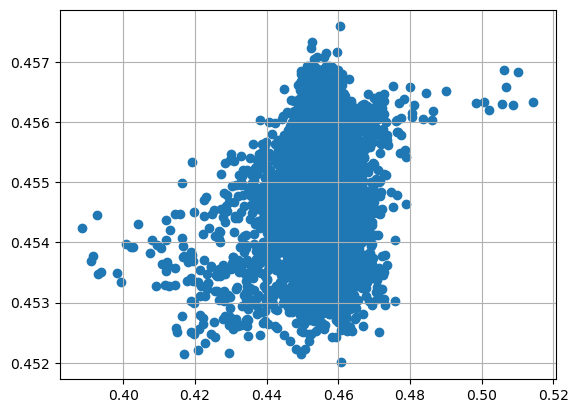

In [72]:
import matplotlib.pyplot as plt

plt.scatter(test_y, pred)
plt.grid()
plt.show()

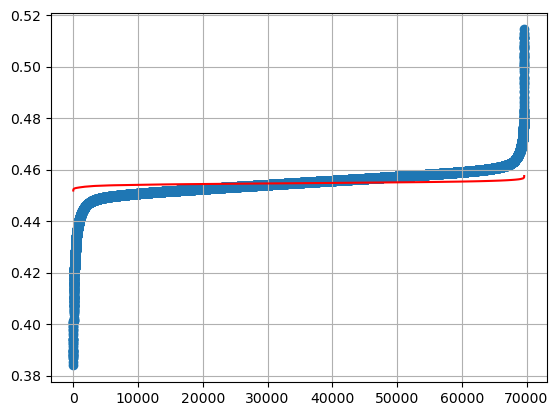

In [76]:
pred = model.predict(train_scaled)
plt.scatter(range(len(train_y)), sorted(train_y))
plt.plot(range(len(train_y)), sorted(pred), color = 'red')
plt.grid()
plt.show()

In [77]:
import statsmodels.api as sm

train_scaled_const = sm.add_constant(train_scaled)
ols_model = sm.OLS(train_y, train_scaled_const).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tube Furnace CP   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     195.9
Date:                Tue, 08 Apr 2025   Prob (F-statistic):          4.74e-208
Time:                        16:58:36   Log-Likelihood:             2.6529e+05
No. Observations:               69636   AIC:                        -5.306e+05
Df Residuals:                   69630   BIC:                        -5.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4548   2.03e-05   2.24e+04      0.000       0.455       0.455
x1             0.0004   2.11e-05     20.372      0.000       0.000       0.000
x2            -0.0003   2.12e-05    -14.032      0.000      -0.000      -0.000
x3            -0.0003   2.05e-05    -16.009      0.000      -0.000      -0.000
x4            -0.0001   2.12e-05     -5.083      0.000      -0.000   -6.61e-05
x5            -0.0002   2.13e-05    -10.031      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    32797.727   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1456792.920
Skew:                          -1.555   Prob(JB):                         0.00
Kurtosis:                      25.190   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3-1, 3-2 결과 해석

각 설명 변수의 회귀계수, 즉 기울기는 0.0004, -0.0003, -0.0003, -0.0001, -0.0002이며,    
각각에 대해 p-value가 0.05 미만이므로 해당 결과가 유의하다고 할 수 있다.  
하지만 모델의 설명력은 0.014로 낮은 편이다

In [79]:
# 잔차 계산
train_pred = ols_model.predict(train_scaled_const)
residuals = train_y - train_pred
residuals

49780    0.001593
72065   -0.002490
19290   -0.000166
91648   -0.004667
72275    0.000891
           ...   
76428   -0.003221
67277   -0.001220
84310   -0.000658
55270   -0.001240
92922    0.001938
Name: Tube Furnace CP, Length: 69636, dtype: float64

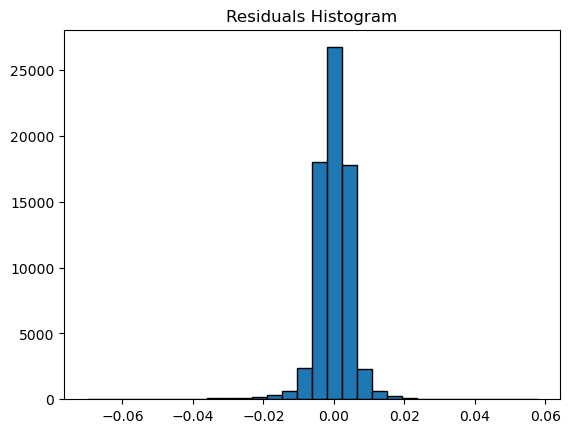

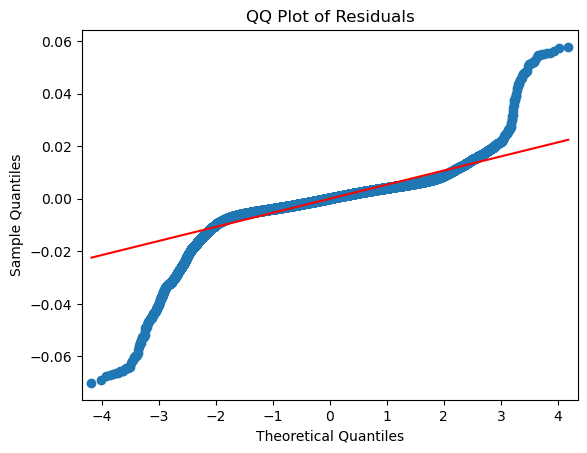

In [80]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# 히스토그램
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Histogram")
plt.show()

# QQ plot
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

In [85]:
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

# 샤피로윌크 테스트
shapiro(residuals)

ShapiroResult(statistic=0.837597679616499, pvalue=1.824676477504056e-117)

## 3-3 결과 해석

샤피로윌크 테스트로 정규성 검정 결과, p-value < 0.05로 오차가 정규성을 따른다는 가설을 기각하여 정규성을 만족하지 않는다.   

# 4. 회귀 모델을 통한 예측
- **목표:** 회귀식을 이용하여 새로운 데이터에 대한 Tube Furnace CP를 예측합니다.
- **작업:**
  - 5개의 설명 변수 값이 순서대로 50, 80, 100, 75, 200일 때 회귀식을 대입하여 Tube Furnace CP(종속 변수 Y)의 값을 계산합니다.


In [86]:
import numpy as np

new_data = np.array([[50, 80, 100, 75, 200]])
new_scaled = ss.transform(new_data)
predicted_cp = model.predict(new_scaled)

predicted_cp[0]

# 바뀐 설명변수값을 표준화한 후 회귀모델에 넣은 결과에 대한 종속변수 Y의 값은 0.456

0.4555202119996785

# 5. 추가 가설 검정 및 라벨 변수 생성
- **목표:** Z1-OP1(공정건조온도 출력량)의 분포 이상치를 판별하고, Code_Num(공정배치그룹)과 이상치 분류('Label') 간의 독립성을 검정합니다.
- **작업:**   
  - Z1-OP1의 평균과 표준편차를 계산한 후, 각 데이터가 평균에서 표준편차의 3배 이상 벗어나면 '이상', 그렇지 않으면 '정상'으로 분류하여 새로운 변수 'Label'을 생성합니다.
  - Code_Num과 'Label' 간의 독립성을 검정하기 위해 적절한 가설 검정(예: 카이제곱 검정)을 실시합니다.

In [89]:
mean_z1 = df["Z1-OP1"].mean()
std_z1 = df["Z1-OP1"].std()

df["Label"] = df["Z1-OP1"].apply(lambda x: "이상" if abs(x - mean_z1) > 3 * std_z1 else "정상")
df.head()

,Unnamed: 0,Code_Num,Datetime,Process_Type,ST,Tube Furnace CP,Tube Furnace1 OP,Tube Furnace1 Temp,Tube Furnace2 OP,Tube Furnace2 Temp,Tube Furnace3 OP,Tube Furnace3 Temp,Tube Furnace4 OP,Tube Furnace4 Temp,Z1-OP1,Z1-OP2,Z1-Temp,Label
2,2,GroupA,2022-01-03 11:22,OP-A,68.724636,0.454914,78.946336,866.441979,62.235532,882.850031,52.218350,864.373065,72.705558,893.530501,72.909936,71.579322,99.614201,정상
3,3,GroupA,2022-01-03 11:22,OP-A,69.161116,0.456540,78.445719,876.350472,61.608260,906.208463,52.863552,891.107865,73.975640,896.347636,68.754355,73.537496,99.376221,정상
4,4,GroupA,2022-01-03 11:22,OP-C,69.181098,0.460100,76.673808,903.587677,61.589311,867.215131,52.297196,893.206883,71.887865,871.594283,69.692302,72.461153,99.809053,정상
5,5,GroupA,2022-01-03 11:22,OP-C,69.472810,0.459051,76.161977,893.336100,61.131382,901.009384,52.514548,891.501638,71.805968,882.495792,73.802112,72.207883,99.770424,정상
6,6,GroupA,2022-01-03 11:22,OP-C,69.189685,0.459515,75.879256,898.617693,59.644186,889.460401,52.466639,864.222256,71.868823,877.136764,71.219875,76.886609,99.852337,정상


In [93]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Code_Num"], df["Label"])
chi2_contingency(contingency_table)

# 카이제곱통계량은 4.99이고 이때의 p-value는 0.41 > 0.05이므로 귀무가설을 기각한다 
# 따라서 Code_Num과 'Label' 간의 차이는 통계적으로 유의하지 않으며, 두 변수는 독립이라고 볼 수 있다 

Chi2ContingencyResult(statistic=4.99166326269974, pvalue=0.4168984630648169, dof=5, expected_freq=array([[1.71545197e+01, 7.32284548e+03],
       [3.06631197e+01, 1.30893369e+04],
       [6.30416913e+01, 2.69109583e+04],
       [7.41500609e+01, 3.16528499e+04],
       [1.45322621e+01, 6.20346774e+03],
       [1.74583463e+01, 7.45254165e+03]]))